In [12]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

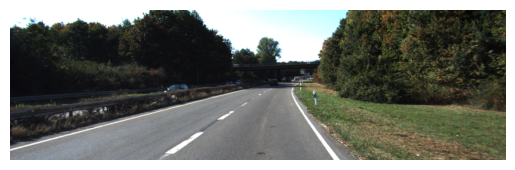

In [13]:
#TODO: read test image - see cv2.imread
image = cv2.imread('um_000093.png')

#TODO: BGR to RGB - see cv2.cvtColor
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#TODO: print out input image - see plt.imshow from matplotlib.pyplot: 
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()


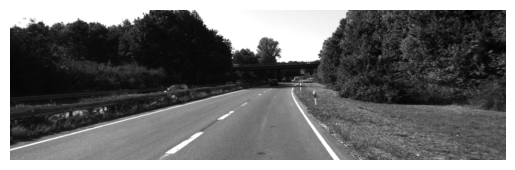

In [14]:
#TODO: apply the grayscale transform - see cv2.cvtColor
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#TODO: print grayscale image
plt.imshow(gray_image, cmap='gray')
plt.axis('off')  # Hide axis
plt.show()

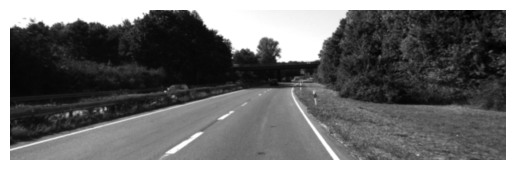

In [15]:
# Gaussian Smoothing
# Define a kernel size for Gaussian smoothing / blurring
kernel_size = 5 # Must be an odd number (3, 5, 7...)

#TODO: apply Gaussian Smoothing - see cv2.GaussianBlur
smoothed_image = cv2.GaussianBlur(gray_image, (kernel_size, kernel_size), 0)

#TODO: print smoothed grayscale image - see plt.imshow
plt.imshow(smoothed_image, cmap='gray')
plt.axis('off')  # Hide axis
plt.show()

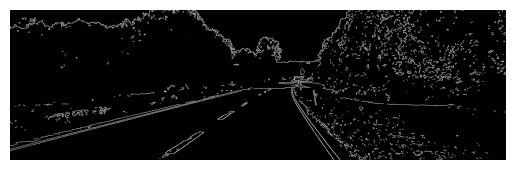

In [16]:
# Canny Edge Detection
# Define parameters for Canny
low_threshold = 180
high_threshold = 240

#TODO: apply Canny - see cv2.Canny
edges = cv2.Canny(gray_image, low_threshold, high_threshold)

#TODO: print Canny edges - see plt.imshow
plt.imshow(edges, cmap='gray')
plt.axis('off')  # Hide axis
plt.show()

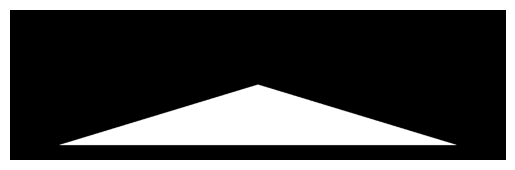

In [17]:
# Region of Interest
#TODO: define vertices (empirically chosen triangle adjusted to the size of the image)
#code here
rows, cols = image.shape[:2]
A = (cols * 0.1, rows * 0.9)
B = (cols * 0.9, rows * 0.9)
C = (cols * 0.5, rows * 0.5)
vertices = np.array([[A, B, C]], dtype=np.int32)

#TODO: create the mask - see cv2.fillPoly
# defining a mask to start with
mask = np.zeros_like(gray_image)
ignore_mask_color = 255

# filling pixels inside the polygon defined by "vertices" with the fill color    
cv2.fillPoly(mask, vertices, ignore_mask_color)

#TODO: print mask
plt.imshow(mask, cmap='gray')
plt.axis('off')  # Hide axis
plt.show()

(376, 1241)
(376, 1241)


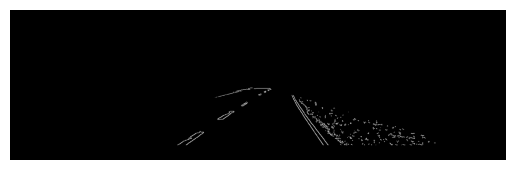

In [18]:
#TODO: Apply the mask to Canny edges - see cv2.bitwise_and
print(edges.shape)
print(mask.shape)
masked_edges = cv2.bitwise_and(edges, mask)

#TODO: print masked Canny edges - see plt.imshow
plt.imshow(masked_edges, cmap='gray')
plt.axis('off')  # Hide axis
plt.show()

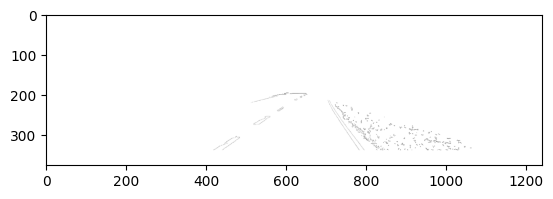

In [19]:
#overlap grayscale image and edges
#TODO: inverse the images
#inverse the masked edges (edge in black, everything else white)
masked_edges_inv = cv2.bitwise_not(masked_edges)
gray_bgr = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)

#TODO: overlap mask with grayed image
#overlap to initial grayscale image - see cv2.addWeighted
edges_over_gray = cv2.addWeighted(gray_bgr, 1, cv2.cvtColor(masked_edges_inv, cv2.COLOR_GRAY2BGR), 1, 0)

#TODO: print image with edges
#print overlapped image
plt.imshow(edges_over_gray, cmap='gray')

In [20]:
# 1. grayscale transform
def grayscale(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  return gray

# 2. gaussian blur and canny edge detector
def blur_and_canny(gray, kernel_size, low_threshold, high_threshold):
  # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)
    # Apply Canny edge detection
    canny_edges = cv2.Canny(blurred, low_threshold, high_threshold)
    return canny_edges

# 3. Region of Interest (ROI): define vertices, create the mask, apply the mask to Canny edges
def ROI(img, initial_img, vertices):
    # Create the mask
    mask = np.zeros_like(img)
    ignore_mask_color = 255
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    # Apply the mask to Canny edges
    masked_edges = cv2.bitwise_and(img, mask)
    # Invert the edges within the defined mask
    masked_edges_inv = cv2.bitwise_not(masked_edges)
    # Convert the grayscale image to BGR
    gray_bgr = cv2.cvtColor(initial_img, cv2.COLOR_GRAY2BGR)
    # Overlap the inversed edges within the defined mask with the grayscale
    
    alpha = 0.2
    beta = 1
    gamma = 0
    edges_over_gray = cv2.addWeighted(gray_bgr, alpha, cv2.cvtColor(masked_edges_inv, cv2.COLOR_GRAY2BGR), beta, gamma)
    return edges_over_gray

In [21]:
#our pipeline as a function
def our_pipeline(image):
    # Grayscale
    gray_img = grayscale(image)

    # Blur & Canny Edge Detection
    kernel_size = 3  # Must be an odd number (3, 5, 7...)
    low_threshold = 120
    high_threshold = 300
    canny_img = blur_and_canny(gray_img, kernel_size, low_threshold, high_threshold)

    # Parameters for transparency
    rows, cols = canny_img.shape[:2]
    A = (cols * 0.2, rows * 0.95)
    B = (cols * 0.8, rows * 0.99)
    C = (cols * 0.5, rows * 0.5)
    vertices = np.array([[A, B, C]], dtype=np.int32)
    
    # Inverse the masked edges (edge in black, everything else white)
    output = ROI(canny_img, gray_img, vertices)

    return output


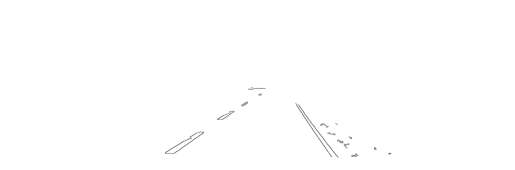

In [22]:
# Read test image
image = cv2.imread('um_000093.png')

# BGR to RGB conversion
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply our_pipeline
output = our_pipeline(image_rgb)


# Save the output image
cv2.imwrite('output_image.png', cv2.cvtColor(output, cv2.COLOR_RGB2BGR))

# Print image
plt.imshow(output)
plt.axis('off')
plt.show()